In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from matplotlib import pyplot as plt
import random

morethandata=pd.read_csv("/Users/vasukhanna/Desktop/more_than_50k.csv")
description=pd.read_csv("/Users/vasukhanna/Desktop/Dataset Description.csv")
morethandata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3580 entries, 0 to 3579
Data columns (total 40 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   AAGE      3580 non-null   int64 
 1   ACLSWKR   3580 non-null   object
 2   ADTIND    3580 non-null   int64 
 3   ADTOCC    3580 non-null   int64 
 4   AHGA      3580 non-null   object
 5   AHRSPAY   3580 non-null   int64 
 6   AHSCOL    3580 non-null   object
 7   AMARITL   3580 non-null   object
 8   AMJIND    3580 non-null   object
 9   AMJOCC    3580 non-null   object
 10  ARACE     3580 non-null   object
 11  AREORGN   3580 non-null   object
 12  ASEX      3580 non-null   object
 13  AUNMEM    3580 non-null   object
 14  AUNTYPE   3580 non-null   object
 15  AWKSTAT   3580 non-null   object
 16  CAPGAIN   3580 non-null   int64 
 17  CAPLOSS   3580 non-null   int64 
 18  DIVVAL    3580 non-null   int64 
 19  FILESTAT  3580 non-null   object
 20  GRINREG   3580 non-null   object
 21  GRINST    3580

In [80]:
pip install pyclustering

Note: you may need to restart the kernel to use updated packages.


In [7]:
print(morethandata.isnull().sum())

AAGE        0
ACLSWKR     0
ADTIND      0
ADTOCC      0
AHGA        0
AHRSPAY     0
AHSCOL      0
AMARITL     0
AMJIND      0
AMJOCC      0
ARACE       0
AREORGN     0
ASEX        0
AUNMEM      0
AUNTYPE     0
AWKSTAT     0
CAPGAIN     0
CAPLOSS     0
DIVVAL      0
FILESTAT    0
GRINREG     0
GRINST      0
HHDFMX      0
HHDREL      0
MIGMTR1     0
MIGMTR3     0
MIGMTR4     0
MIGSAME     0
MIGSUN      0
NOEMP       0
PARENT      0
PEFNTVTY    0
PEMNTVTY    0
PENATVTY    0
PRCITSHP    0
SEOTR       0
VETQVA      0
VETYN       0
WKSWORK     0
YEAR        0
dtype: int64


In [7]:
for i in morethandata :
    
    morethandata[i][morethandata[i]=='?']=np.nan

/var/folders/zr/yqnbpb7n7vvcvk35sn9k86640000gn/T/ipykernel_21700/4091684920.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vari1[vari1==' ?']=np.nan


In [8]:
print(morethandata.isnull().sum())

AAGE           0
ACLSWKR        0
ADTIND         0
ADTOCC         0
AHGA           0
AHRSPAY        0
AHSCOL         0
AMARITL        0
AMJIND         0
AMJOCC         0
ARACE          0
AREORGN        0
ASEX           0
AUNMEM         0
AUNTYPE        0
AWKSTAT        0
CAPGAIN        0
CAPLOSS        0
DIVVAL         0
FILESTAT       0
GRINREG        0
GRINST        14
HHDFMX         0
HHDREL         0
MIGMTR1     1906
MIGMTR3     1906
MIGMTR4     1906
MIGSAME        0
MIGSUN      1906
NOEMP          0
PARENT         0
PEFNTVTY     162
PEMNTVTY     134
PENATVTY      93
PRCITSHP       0
SEOTR          0
VETQVA         0
VETYN          0
WKSWORK        0
YEAR           0
dtype: int64


In [8]:
# removing data with 30% null values
drop=["MIGMTR1","MIGMTR3","MIGMTR4","MIGSUN"]
for i in drop:
    morethandata=morethandata.drop(i,axis=1)

In [9]:
for col in morethandata.columns:
    mode=morethandata[col].mode()
    morethandata[col].fillna(mode[0],inplace=True)

print(morethandata.isnull().sum())

AAGE        0
ACLSWKR     0
ADTIND      0
ADTOCC      0
AHGA        0
AHRSPAY     0
AHSCOL      0
AMARITL     0
AMJIND      0
AMJOCC      0
ARACE       0
AREORGN     0
ASEX        0
AUNMEM      0
AUNTYPE     0
AWKSTAT     0
CAPGAIN     0
CAPLOSS     0
DIVVAL      0
FILESTAT    0
GRINREG     0
GRINST      0
HHDFMX      0
HHDREL      0
MIGSAME     0
NOEMP       0
PARENT      0
PEFNTVTY    0
PEMNTVTY    0
PENATVTY    0
PRCITSHP    0
SEOTR       0
VETQVA      0
VETYN       0
WKSWORK     0
YEAR        0
dtype: int64


In [10]:
morethandata["AAGE"].max()
morethandata["AAGE"].mean()
bins=[0,13,18,60,100]
labels=["Child","Teenager","Adult","Elderly"]
morethandata["AAGE_category"]=pd.cut(morethandata["AAGE"],bins,labels=labels)


In [11]:
morethandata["AHRSPAY"].max()
morethandata["AHRSPAY"].mean()
bins=[-1,100,500,10000]
labels=["low wage","average wage","high Wage"]
morethandata["WAGE_CATEGORY"]=pd.cut(morethandata["AHRSPAY"],bins,labels=labels)


In [12]:

morethandata["CAPGAIN"].mean()
bins=[-1,100,1000,20000,100000]
labels=["low ","average ","Good "," very High"]
morethandata["Cap_gain"]=pd.cut(morethandata["CAPGAIN"],bins,labels=labels)


In [13]:
morethandata["CAPLOSS"].mean()
bins=[-1,20,100,3000,5000]
labels=["low ","average ","High "," Very High"]
morethandata["Cap_loss"]=pd.cut(morethandata["CAPLOSS"],bins,labels=labels)


In [14]:
morethandata["DIVVAL"].mean()
bins=[-1,100,500,20000,100000]
labels=["low ","average ","Good ","Very High"]
morethandata["Div_val"]=pd.cut(morethandata["DIVVAL"],bins,labels=labels)


In [15]:
morethandata["WKSWORK"].mean()
bins=[-1,15,25,40,50]
labels=["less ","average ","above average ","High"]
morethandata["WKSWORK_category"]=pd.cut(morethandata["WKSWORK"],bins,labels=labels)


In [16]:
categorised_data=["AAGE","AHRSPAY","CAPGAIN","CAPLOSS","DIVVAL","WKSWORK"]
for i in categorised_data:
    morethandata=morethandata.drop(i,axis=1)

In [17]:
morethandata

,ACLSWKR,ADTIND,ADTOCC,AHGA,AHSCOL,AMARITL,AMJIND,AMJOCC,ARACE,AREORGN,...,SEOTR,VETQVA,VETYN,YEAR,AAGE_category,WAGE_CATEGORY,Cap_gain,Cap_loss,Div_val,WKSWORK_category
0,Self-employed-incorporated,11,2,High school graduate,Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Executive admin and managerial,White,All other,...,0,Not in universe,2,95,Adult,low wage,low,low,average,NaN
1,Private,3,38,High school graduate,Not in universe,Married-civilian spouse present,Mining,Transportation and material moving,White,All other,...,0,No,1,94,Adult,low wage,low,low,low,High
2,Private,19,26,High school graduate,Not in universe,Married-civilian spouse present,Manufacturing-nondurable goods,Adm support including clerical,White,All other,...,0,Not in universe,2,94,Adult,high Wage,low,low,low,NaN
3,Private,33,2,9th grade,Not in universe,Never married,Retail trade,Executive admin and managerial,White,All other,...,1,Not in universe,2,95,Adult,low wage,Good,low,average,NaN
4,Private,11,5,Bachelors degree(BA AB BS),Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Professional specialty,White,All other,...,0,Not in universe,2,95,Adult,low wage,low,low,low,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3575,Private,14,37,High school graduate,Not in universe,Divorced,Manufacturing-durable goods,Machine operators assmblrs & inspctrs,White,All other,...,0,Not in universe,2,94,Adult,low wage,low,low,Good,NaN
3576,Self-employed-not incorporated,37,12,Masters degree(MA MS MEng MEd MSW MBA),Not in universe,Separated,Business and repair services,Professional specialty,White,All other,...,0,Not in universe,2,94,Elderly,low wage,low,low,low,High
3577,Private,41,6,Masters degree(MA MS MEng MEd MSW MBA),Not in universe,Married-civilian spouse present,Hospital services,Professional specialty,White,All other,...,0,Not in universe,2,95,Adult,low wage,low,low,Good,NaN
3578,Self-employed-incorporated,35,2,Bachelors degree(BA AB BS),Not in universe,Married-civilian spouse present,Finance insurance and real estate,Executive admin and managerial,White,All other,...,0,Not in universe,2,94,Adult,low wage,low,High,average,NaN


In [18]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()
features=encoder.fit_transform(morethandata[['ACLSWKR', 'ADTIND', 'ADTOCC', 'AHGA', 'AHSCOL', 'AMARITL', 'AMJIND', 'AMJOCC', 'ARACE', 'AREORGN', 'ASEX', 'AUNMEM', 'AUNTYPE', 'AWKSTAT', 'FILESTAT', 'GRINREG', 'GRINST', 'HHDFMX', 'HHDREL', 'MIGSAME', 'NOEMP', 'PARENT', 'PEFNTVTY', 'PEMNTVTY', 'PENATVTY', 'PRCITSHP', 'SEOTR', 'VETQVA', 'VETYN', 'YEAR', 'AAGE_category', 'WAGE_CATEGORY', 'Cap_gain', 'Cap_loss', 'Div_val', 'WKSWORK_category']]).toarray()
np.array(features)
labels=encoder.categories_
flatlist=[]
for sublist in labels:
    for element in sublist:
        flatlist.append(element)
labels=flatlist


In [19]:
new_DataFrame=pd.DataFrame(features,columns=labels)
new_DataFrame

,Federal government,Local government,Never worked,Not in universe,Private,Self-employed-incorporated,Self-employed-not incorporated,State government,0,1,...,low,Good,Very High,average,low,High,above average,average,less,NaN
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3575,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3576,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3577,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3578,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [20]:
class Cluster_KMedian():
    
    def __init__(self,noOfClusters=3,noOfIterations=5,n_dimensions=40):
        
        self.noOfClusters=noOfClusters
        
        self.noOfIterations=noOfIterations
        
        self.n_dimensions=n_dimensions
    
    def fit(self,data,plot=False):
        
        self.data=data
        
        self.centers=np.zeros((self.noOfClusters,self.n_dimensions))
        
        self.randoms=random.sample(range(len(data)),self.noOfClusters)
        
        i=0
        while i<len(self.randoms):
            self.centers[i]=data[self.randoms[i]]
            i=i+1
            
            
        self.iterations =[] 
        
        self.store_loss =[]
        
        iterations=0
        while iterations<self.noOfIterations:

            self.distance={}
            self.iterations.append(iterations)
            iterations=iterations+1
            v=0
            while v<self.noOfClusters:

                self.distance[v]=self.data-self.centers[v]
                self.distance[v]=np.absolute(self.distance[v])
                self.distance[v]=np.sum(self.distance[v],axis=1)
                v=v+1
                
                
                
                
            self.min_distance=self.distance[0]
            
            
            k=0
            while k<self.noOfClusters:

                self.min_distance=np.minimum(self.min_distance,self.distance[k])
                k=k+1
            
            self.store_loss.append(np.sum(self.min_distance))
            
            self.clusters={}
            
            j=0
            while j<self.noOfClusters:

                self.clusters[j]=(self.distance[j]==self.min_distance)
                self.clusters[j]=self.data[self.clusters[j]]
                j=j+1
            
            
            q=0
            while q<self.noOfClusters:
                self.centers[q]=np.median(self.clusters[q],axis=0)
                q=q+1
        
        loss=self.store_loss[-1]
        return loss,self.clusters
    def predict(self, test_data):
        predictions = []
        for point in test_data:
            ## N1 norm 
            distances = [(abs(point - m)).sum() for m in self.centers]
            ## minDistance
            minDistance = min(distances)
            ## find corresponding index
            l = distances.index(minDistance)
            ## append the cluster index
            predictions.append(l)
        return predictions

        

In [22]:
from sklearn.decomposition import PCA
pca=PCA(n_components=40)
reduced_new=pca.fit_transform(new_DataFrame)
K=[]
loss_val=[]
ans=np.asarray(reduced_new)
for i in range(10,25):
    K.append(i)
    obj=Cluster_KMedian()
    loss,_=obj.fit(ans)
    loss_val.append(loss/i)

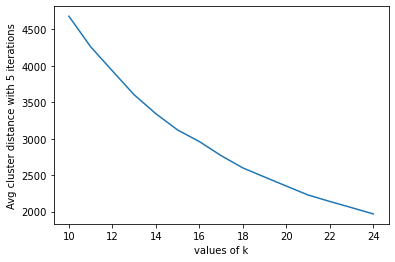

In [23]:
plt.xlabel("values of k")
plt.ylabel("Avg cluster distance with 5 iterations")
plt.plot(K,loss_val)


In [24]:
loss,moreclust=obj.fit(ans)

In [27]:
mclust=[]

for i in moreclust:
    vari_df=pd.DataFrame(moreclust[i])
    vari_df['label']=i
    mclust.append(vari_df)
    
more_all=pd.concat(mclust)

more_labels=more_all['label']
mpoints=more_all.drop('label',axis=1)

In [50]:
pca2=PCA(2)
mprojected = pca2.fit_transform(mpoints)

Text(0, 0.5, 'feature 2')

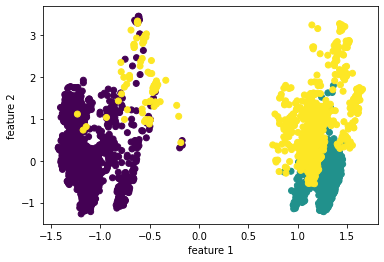

In [51]:
plt.scatter(projected[:, 0], projected[:, 1],c=population_labels)
plt.xlabel('feature 1')
plt.ylabel('feature 2')

In [28]:
pcav = PCA(40) 
new=new_DataFrame
n = pcav.fit_transform(new)

In [32]:
helper = new_DataFrame
model = Cluster_KMedian(17,50)
model.fit(np.array(n))
    
helper_pred = model.predict(np.array(n))
centers = model.centers

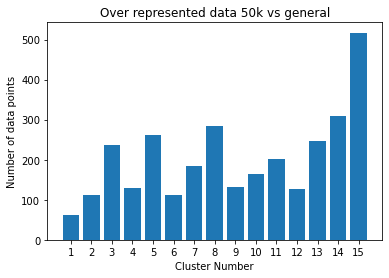

In [39]:
freq = pd.Series(helper_pred).value_counts()
x = [i for i in range(1,16)]
y = np.array([freq[i] for i in range(15)])

plt.title("Over represented data 50k vs general")
plt.xlabel("Cluster Number")
plt.ylabel("Number of data points")
plt.xticks(np.arange(1, 16, step=1))
plt.bar(x,y)
plt.show()


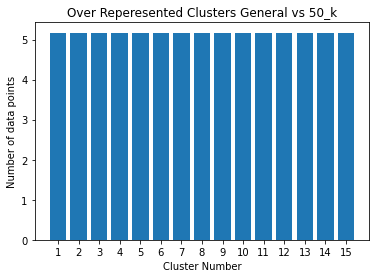

In [38]:
## 6.2

## scale frequency arrays
a = np.array([freq[i] for i in range(15)])
y = y*100.0/y.max()

## over represented in general vs 50_k
ratio_1 = a/y

plt.title("Over Reperesented Clusters General vs 50_k")
plt.xlabel("Cluster Number")
plt.xticks(np.arange(1, 16, step=1))
plt.ylabel("Number of data points")
plt.bar(x,ratio_1)
plt.show()

In [69]:
median2=np.median(mclust[2],axis=0)
obj=pd.Series(median2)
obj.sort_values(ascending=False,inplace=True)
obj.head()

6    -0.095196
13   -0.095864
16   -0.116291
5    -0.128700
7    -0.153153
dtype: float64

 Not in universe                          -0.411263
 Not in universe                          -0.386559
 Yes                                      -0.372037
2                                         -0.233453
Elderly                                   -0.105069
                                             ...   
 South                                     0.122359
 West                                      0.138008
 Masters degree(MA MS MEng MEd MSW MBA)    0.165502
0                                          0.325139
 No                                        0.411263
Name: 16, Length: 434, dtype: float64


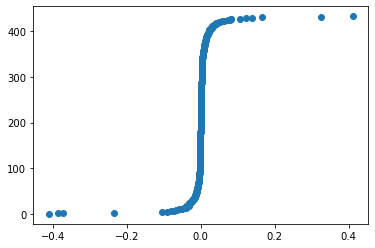

In [81]:
selected_features=pd.DataFrame(pca.components_, columns=new_DataFrame.columns).T
vasu=selected_features[16].sort_values()
plt.scatter(vasu,y=[range(len(vasu))])
print(vasu)

 Male                         -0.416341
low                           -0.198490
6                             -0.189295
Good                          -0.176534
 Bachelors degree(BA AB BS)   -0.162381
                                 ...   
low                            0.198526
 Private                       0.204299
0                              0.216152
 Householder                   0.234489
 Female                        0.416341
Name: 13, Length: 434, dtype: float64


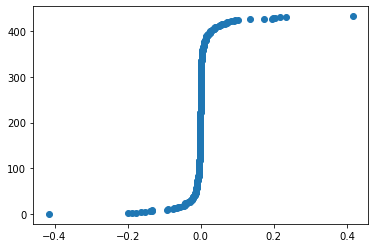

In [82]:
selected_features=pd.DataFrame(pca.components_, columns=new_DataFrame.columns).T
vasu=selected_features[13].sort_values()
plt.scatter(vasu,y=[range(len(vasu))])
print(vasu)

 United-States                                 -0.429456
 United-States                                 -0.423683
 Native- Born in the United States             -0.381786
 United-States                                 -0.342313
 White                                         -0.186188
                                                  ...   
low                                             0.152298
 Foreign born- Not a citizen of U S             0.164723
2                                               0.179016
 Foreign born- U S citizen by naturalization    0.185495
 Executive admin and managerial                 0.196052
Name: 7, Length: 434, dtype: float64


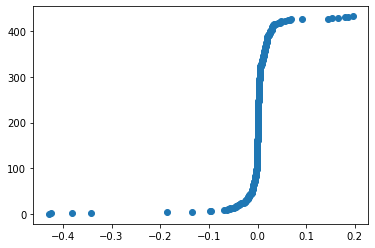

In [83]:
selected_features=pd.DataFrame(pca.components_, columns=new_DataFrame.columns).T

vasu=selected_features[7].sort_values()
plt.scatter(vasu,y=[range(len(vasu))])
print(vasu)